## Week 10 Lab exercises

In this week we will investigate numerical differentiation and solve the heat equation numerically.

In [1]:
import numpy as np
from sympy import symbols, simplify, pprint, diff
from scipy.interpolate import lagrange
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# We will be working with this test function throughout the exercises:

def get_y_test_function(a_x_points) :
    y_test = np.exp(-a_x_points*a_x_points)
    return y_test

def get_dydx_test_function(a_x_points) :
    dydt_test = -2.0 * a_x_points * np.exp(-a_x_points*a_x_points)
    return dydt_test   

def get_d2ydx2_test_function(a_x_points) :
    d2ydt2_test = (4.0 * a_x_points * a_x_points * np.exp(-a_x_points*a_x_points)
                 - 2.0 * np.exp(-a_x_points*a_x_points))
    return d2ydt2_test 

### ACTIVITY 1 - differentiation: 

First we are going to practise finding the stencil values from first principles using Lagrange functions. Below we use sympy to work out the stencil for the first derivative for 3 evenly spaced points.

In [3]:
# Construct the polynomial using sympy
x = symbols('x')
deltax = symbols('dx')
x2 = symbols('x2')
x1 = x2-deltax
x3 = x2+deltax
f1 = symbols('f1')
f2 = symbols('f2')
f3 = symbols('f3')
L1 = (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3)
L2 = (x - x1 ) / (x2 - x1) * (x - x3 ) / (x2 - x3)
L3 = (x - x1 ) / (x3 - x1) * (x - x2 ) / (x3 - x2)
P = f1 * L1 + f2 * L2 + f3 * L3
print("Using sympy we get the polynomial", simplify(P)) # substitute x1 = x2-deltax and x3 = x2+deltax to get there
#pprint(simplify(P))

# Now take the derivative
dPdx = diff(P, x)
print("Its derivative is", simplify(dPdx))
#pprint(simplify(dPdx))

# Now find the value at the central point x2
dPdx_at_x2 = dPdx.subs(x, x2)
print("Its derivative at x2 is", simplify(dPdx_at_x2))
print("This gives the stencil \n")
pprint(simplify(dPdx_at_x2))

Using sympy we get the polynomial (-f1*(x - x2)*(dx - x + x2) + 2*f2*(dx - x + x2)*(dx + x - x2) + f3*(x - x2)*(dx + x - x2))/(2*dx**2)
Its derivative is (-dx*f1/2 + dx*f3/2 + f1*x - f1*x2 - 2*f2*x + 2*f2*x2 + f3*x - f3*x2)/dx**2
Its derivative at x2 is (-f1 + f3)/(2*dx)
This gives the stencil 

-f₁ + f₃
────────
  2⋅dx  


### Q1.1 Constructing the 2nd derivative stencil for 5 evenly spaced points 

Copy and amend the code above to work out the stencil for the **second derivative** using **5 evenly spaced points** instead. Check your result against the [finite difference calculator](https://web.media.mit.edu/~crtaylor/calculator.html) (remember you want the second derivative).

In [4]:
# Your code here...

# Construct the polynomial using sympy
x = symbols('x')
deltax = symbols('dx')
x3 = symbols('x3')
x2 = x3 - deltax
x1 = x2 - deltax
x4 = x3 + deltax
x5 = x4 + deltax
f1 = symbols('f1')
f2 = symbols('f2')
f3 = symbols('f3')
f4 = symbols('f4')
f5 = symbols('f5')

L1 = (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3) * (x - x4 ) / (x1 - x4) * (x - x5 ) / (x1 - x5)
L2 = (x - x1 ) / (x2 - x1) * (x - x3 ) / (x2 - x3) * (x - x4 ) / (x2 - x4) * (x - x5 ) / (x2 - x5)
L3 = (x - x1 ) / (x3 - x1) * (x - x2 ) / (x3 - x2) * (x - x4 ) / (x3 - x4) * (x - x5 ) / (x3 - x5)
L4 = (x - x1 ) / (x4 - x1) * (x - x2 ) / (x4 - x2) * (x - x3 ) / (x4 - x3) * (x - x5 ) / (x4 - x5)
L5 = (x - x1 ) / (x5 - x1) * (x - x2 ) / (x5 - x2) * (x - x4 ) / (x5 - x4) * (x - x3 ) / (x5 - x3)
P = f1 * L1 + f2 * L2 + f3 * L3 + f4 * L4 + f5 * L5
print("Using sympy we get the polynomial", simplify(P)) # substitute x1 = x2-deltax and x3 = x2+deltax to get there
#pprint(simplify(P))

# Now take the derivative
dPdx = diff(P, x)
d2Pdx2 = diff(dPdx, x)
print("Its second derivative is", simplify(d2Pdx2))
#pprint(simplify(dPdx))

# Now find the value at the central point x2
d2Pdx2_at_x2 = d2Pdx2.subs(x, x3)
print("Its second derivative at x2 is", simplify(d2Pdx2_at_x2))
print("This gives the stencil \n")
pprint(simplify(d2Pdx2_at_x2))


Using sympy we get the polynomial (f1*(x - x3)*(dx - x + x3)*(dx + x - x3)*(2*dx - x + x3) - 4*f2*(x - x3)*(dx - x + x3)*(2*dx - x + x3)*(2*dx + x - x3) + 6*f3*(dx - x + x3)*(dx + x - x3)*(2*dx - x + x3)*(2*dx + x - x3) + 4*f4*(x - x3)*(dx + x - x3)*(2*dx - x + x3)*(2*dx + x - x3) - f5*(x - x3)*(dx - x + x3)*(dx + x - x3)*(2*dx + x - x3))/(24*dx**4)
Its second derivative is (-dx**2*f1/12 + 4*dx**2*f2/3 - 5*dx**2*f3/2 + 4*dx**2*f4/3 - dx**2*f5/12 - dx*f1*x/2 + dx*f1*x3/2 + dx*f2*x - dx*f2*x3 - dx*f4*x + dx*f4*x3 + dx*f5*x/2 - dx*f5*x3/2 + f1*x**2/2 - f1*x*x3 + f1*x3**2/2 - 2*f2*x**2 + 4*f2*x*x3 - 2*f2*x3**2 + 3*f3*x**2 - 6*f3*x*x3 + 3*f3*x3**2 - 2*f4*x**2 + 4*f4*x*x3 - 2*f4*x3**2 + f5*x**2/2 - f5*x*x3 + f5*x3**2/2)/dx**4
Its second derivative at x2 is (-f1 + 16*f2 - 30*f3 + 16*f4 - f5)/(12*dx**2)
This gives the stencil 

-f₁ + 16⋅f₂ - 30⋅f₃ + 16⋅f₄ - f₅
────────────────────────────────
                  2             
             12⋅dx              


### Q1.2 Pseudospectral derivatives

The code below gives you the matrices for the first and second derivative of a function represented by N+1 points assuming an interval [-1,1]. There is code that checks the first derivative - copy it and check the second derivative in the same way.

_HINT - note the need to rescale the derivative according to the interval - think about how this needs to change for the second derivative._

In [5]:
def get_pseudospectral_first_derivative_matrix(N) :
    
    indices = np.arange(N+1)
    u_i = np.cos(np.pi * indices / N)
    c_i = np.ones_like(indices)
    c_i[0] = 2.0 # first element
    c_i[N] = 2.0 # last element

    D_matrix = np.zeros([N+1,N+1])

    for idx_i in indices :
        for idx_j in indices :
            if(idx_i == 0 and idx_j == 0) : # element 11 (1st row, 1st column)
                D_matrix[idx_i,idx_j] = (2.0 * N * N + 1.0)/6.0 
                
            elif (idx_i == N and idx_j == N) : # element NN (Nth row, Nth column)
                D_matrix[idx_i,idx_j] = -(2.0 * N * N + 1.0)/6.0
                
            elif (idx_i == idx_j) : # diagonals 
                D_matrix[idx_i,idx_j] = - u_i[idx_i] / 2.0 / (1.0 - u_i[idx_i] * u_i[idx_i])
                
            else :
                D_matrix[idx_i,idx_j] = (c_i[idx_i] / c_i[idx_j] * (-1)**(idx_i+idx_j) 
                                         / (u_i[idx_i] - u_i[idx_j]))

    # Fix numerical errors when function flat         
    for idx_i in indices :
        D_matrix[idx_i,idx_i] = 0
        for idx_j in indices :
            if (idx_j != idx_i) : # non-diagonal elements
                D_matrix[idx_i,idx_i] += -D_matrix[idx_i,idx_j]                

    return D_matrix

def get_pseudospectral_second_derivative_matrix(N) :
    
    indices = np.arange(N+1)
    u_i = np.cos(np.pi * indices / N)
    c_i = np.ones_like(indices)
    c_i[0] = 2.0
    c_i[N] = 2.0

    D2_matrix = np.zeros([N+1,N+1])

    for idx_i in indices :
        for idx_j in indices :
            if((idx_i == idx_j) and (idx_i == 0 or idx_i == N)) : # element 11 and element NN
                D2_matrix[idx_i,idx_j] = (N ** 4.0 - 1.0) / 15.0
            
            elif ((idx_i == idx_j) and (idx_i != 0) and (idx_i != N)) : # diagonal elements but not 11 or NN
                D2_matrix[idx_i,idx_j] = (- ((N*N - 1.0) * (1.0 - u_i[idx_i] * u_i[idx_i]) + 3.0) 
                                             / (3.0 * (1.0 - u_i[idx_i] * u_i[idx_i]) ** 2.0))
                 
            elif (idx_i == 0 and idx_j > 0) : # 1st row elements but not element 11
                D2_matrix[idx_i,idx_j] = ((2.0 / 3.0) * ((-1) ** idx_j) / c_i[idx_j] 
                                          * ((2.0 * N * N + 1.0) * (1.0 - u_i[idx_j]) - 6.0)
                                          / (1.0 - u_i[idx_j]) / (1.0 - u_i[idx_j]))
                
            elif (idx_i == N and idx_j < N) : # last row elements but not element NN
                D2_matrix[idx_i,idx_j] = ((2.0 / 3.0) * ((-1) ** (N+idx_j)) / c_i[idx_j] 
                                          * ((2.0 * N * N + 1.0) * (1.0 + u_i[idx_j]) - 6.0)
                                          / (1.0 + u_i[idx_j]) / (1.0 + u_i[idx_j]))
                
            else : # everything else inbetween 
                D2_matrix[idx_i,idx_j] = (((-1) ** (idx_i+idx_j)) / c_i[idx_j] 
                                            * (u_i[idx_i]*u_i[idx_i] + u_i[idx_i]*u_i[idx_j] - 2.0)
                                            / (1.0 - u_i[idx_i]*u_i[idx_i]) / (u_i[idx_i] - u_i[idx_j])
                                            / (u_i[idx_i] - u_i[idx_j]))

    # Fix numerical errors when function flat            
    for idx_i in indices :
        D2_matrix[idx_i,idx_i] = 0
        for idx_j in indices :
            if (idx_j != idx_i) : 
                D2_matrix[idx_i,idx_i] += -D2_matrix[idx_i,idx_j]
                
    return D2_matrix

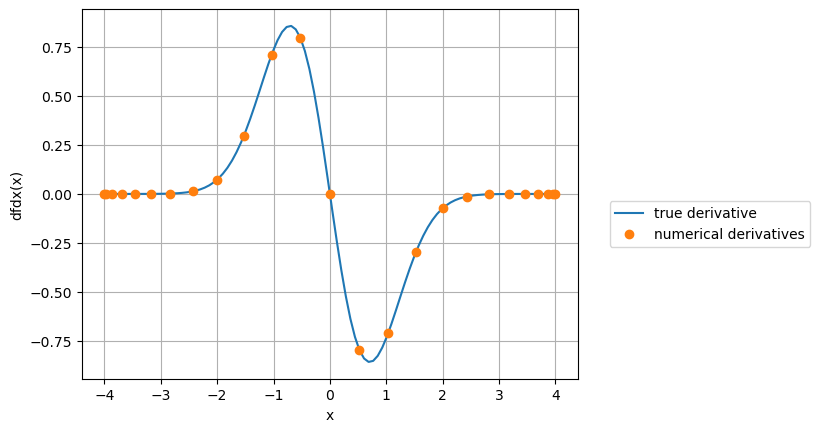

In [6]:
# Testing the first derivatives
N = 24 # number of points 
a = -4 # interval [-4, 4]
b = 4

# Find the Gauss Lobato nodes
indices = np.arange(N+1)
u_points = np.cos(np.pi * indices / N)
x_points = (b - a)/2.0 * u_points + (a + b)/2.0
y_points = get_y_test_function(x_points) # function evaluated at the Gauss-Lobato nodes

D_matrix = get_pseudospectral_first_derivative_matrix(N)
# Rescale from interval [-1, 1] to [a, b]
dydx = 2.0/(b - a)* np.dot(D_matrix, y_points) # derivative of function evaluated at the Gauss-Lobato nodes

# Plots
x_true = np.linspace(a,b,100)
plt.plot(x_true, get_dydx_test_function(x_true), '-', label="true derivative")
plt.plot(x_points, dydx, 'o', label="numerical derivatives")
plt.xlabel("x")
plt.ylabel("dfdx(x)")
plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.grid();

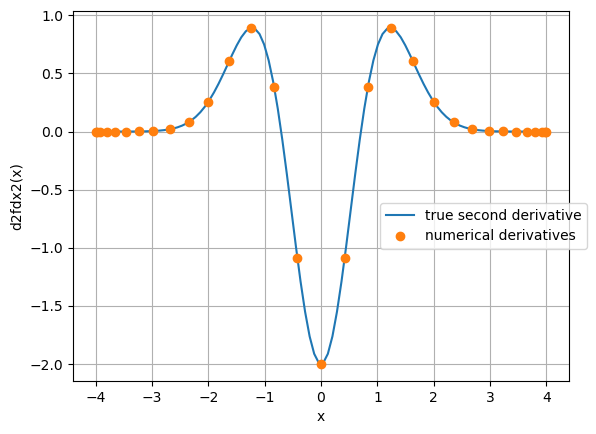

In [7]:
# Your code here...

# Testing the first derivatives
N = 30 # number of points 
a = -4 # interval [-4, 4]
b = 4

# Find the Gauss Lobato nodes
indices = np.arange(N+1)
u_points = np.cos(np.pi * indices / N)
x_points = (b - a)/2.0 * u_points + (a + b)/2.0
y_points = get_y_test_function(x_points) # function evaluated at the Gauss-Lobato nodes

D2_matrix = get_pseudospectral_second_derivative_matrix(N)
# Rescale from interval [-1, 1] to [a, b]
d2ydx2 = 4.0/(b - a)/(b - a) * np.dot(D2_matrix, y_points) # derivative of function evaluated at the Gauss-Lobato nodes

# Plots
x_true = np.linspace(a,b,100)
plt.plot(x_true, get_d2ydx2_test_function(x_true), '-', label="true second derivative")
plt.plot(x_points, d2ydx2, 'o', label="numerical derivatives")
plt.xlabel("x")
plt.ylabel("d2fdx2(x)")
plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.grid();

### Q1.3 Finite derivative matrix

Using the 5 point finite derivative stencil you have found in the previous question, construct a matrix that can be applied to the vector of function values to evaluate its second derivatives, assuming an equal step size in the range [-1,1]. Note that is is much simpler than the pseudospectral one, but you can use that as a base. 

Apply it to our test function to check it works!

_HINT - you will need to find the stencils for the end points where the 2 neighbouring points do not exist. You can sue the [finite difference calculator](https://web.media.mit.edu/~crtaylor/calculator.html) to obtain these using a one sided stencil with 3 points, which is lower order accurate but will work ok!_

The second derivative formula:

$$\frac{g(x+\Delta{x}) - 2g(x) + g(x-\Delta{x})}{\Delta{x}^2}$$

The stencil found before is:

$$ \frac{-f_1 + 16f_2 -30f_3 + 16f_4 - f_5}{12 \Delta{x}^2}$$

In [8]:
# Your code here...

def get_FD_second_derivative_matrix(N) :

    h = 2.0 / N # delta x
    one_over_h2 = 1.0 / (h*h) # 1 / (delta_x)^2
    D2_matrix = np.zeros([N+1,N+1])

    indices = np.arange(N+1)
    for idx_i in indices:
        for idx_j in indices:
            if (idx_i == idx_j): # diagonal entries
                D2_matrix[idx_i, idx_j] = -30.0/12.0 * one_over_h2

            elif (idx_i == (idx_j+2)): 
                D2_matrix[idx_i, idx_j] = -1.0/12.0 * one_over_h2

            elif (idx_i == (idx_j+1)):
                D2_matrix[idx_i, idx_j] = 16.0/12.0 * one_over_h2

            elif (idx_i == (idx_j-1)):
                D2_matrix[idx_i, idx_j] = 16.0/12.0 * one_over_h2

            elif (idx_i == (idx_j-2)):
                D2_matrix[idx_i, idx_j] = -1.0/12.0 * one_over_h2

            else:
                D2_matrix[idx_i, idx_j] = 0.0

    #  Fix the ends with one sided derivatives
    D2_matrix[0,0] = 1.0*one_over_h2
    D2_matrix[0,1] = -2.0*one_over_h2
    D2_matrix[0,2] = 1.0*one_over_h2
    D2_matrix[N,N] = 1.0*one_over_h2
    D2_matrix[N,N-1] = -2.0*one_over_h2
    D2_matrix[N,N-2] = 1.0*one_over_h2
    
    return D2_matrix

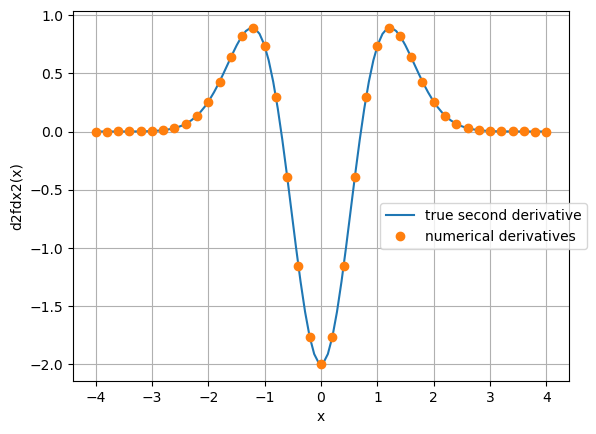

In [9]:
N=40 
a=-4
b=4

x_points = np.linspace(a,b,N+1)
y_points = get_y_test_function(x_points) # function evaluated at the Gauss-Lobato nodes

D2_matrix = get_FD_second_derivative_matrix(N)
# Rescale from interval [-1, 1] to [a, b]
d2ydx2 = 4.0/(b - a)/(b - a) * np.dot(D2_matrix, y_points) # derivative of function evaluated at the Gauss-Lobato nodes

# Plots
x_true = np.linspace(a,b,100)
plt.plot(x_true, get_d2ydx2_test_function(x_true), '-', label="true second derivative")
plt.plot(x_points, d2ydx2, 'o', label="numerical derivatives")
plt.xlabel("x")
plt.ylabel("d2fdx2(x)")
plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.grid();

### ACTIVITY 2 : Solving the heat equation using solve_ivp()
    
Here we will solve the heat equation using solve_ivp() and the two derivative methods above.

$ \frac{\partial T}{\partial t} = - \alpha \frac{\partial^2 T}{\partial x^2} $

With $\alpha$ a parameter for the diffusivity that we can set to 0.5.

### Q2.1 Using finite differences

Here is an example using the finite difference your wrote above and using the test function as the initial condition $T(x,t=0)$. Test it using different functions as initial conditions.

Note that you need to have called your second derivative matrix function `get_FD_second_derivative_matrix(N)` for this to work!

In [10]:
# First make a class for the Heat Equation

class HeatEquationPDE :
    
    """
    Represents the Heat Equation equation PDE and its solution
    
    attributes: alpha (diffusivity), x_0, T_0 (an initial condition),
                N_grid (the size of the grid)
    
    """
    
    # constructor function
    def __init__(self, a_x, a_T0, a_max_time, a_alpha=0.5, method = "finite_difference"):
        self.alpha = a_alpha
        self.max_time = a_max_time
        self.x = a_x
        self.T0 = a_T0
        self.N_grid = np.size(a_x)            
        self._solution_t = []
        self._solution_y = []
        
        self.initial_value = self.T0
        
        # You need to write this function above for this to work!
        if method == "finite_difference":
            self.D2_matrix = get_FD_second_derivative_matrix(self.N_grid-1)
        elif method == "pseudospectral":
            self.D2_matrix = get_pseudospectral_second_derivative_matrix(self.N_grid-1)
        else: 
            assert False, "This derivatice method has not been implemented"
            
        # Rescale for the derivative matrix for the interval we are looking at
        b_minus_a = self.x[self.N_grid-1] - self.x[0]
        self.D2_matrix *= 4.0 / b_minus_a / b_minus_a

    def calculate_dydt(self, t, current_state) : # CALCULATE THE DERIVATIVE USING FINITE DIFFERENCES / PSEDOSPECTRAL METHOD
        
        # Just for readability
        dTdt = np.zeros_like(current_state)
        
        # Now actually work out the time derivatives
        dTdt[:] =  self.alpha * np.dot(self.D2_matrix, current_state)
           
        # Zero the derivatives at the end for stability (two first positions and two last positions)
        # (especially important in the pseudospectral method)
        dTdt[0] = 0.0
        dTdt[1] = 0.0
        dTdt[self.N_grid-1] = 0.0
        dTdt[self.N_grid-2] = 0.0
        
        return dTdt       
 
    def integrate_using_solve_ivp(self) :
        
        t_solution = np.linspace(0.0, self.max_time, 100)
        solution = solve_ivp(self.calculate_dydt, [0, self.max_time],
                        self.initial_value, t_eval=t_solution)
        
        self._solution_t = solution.t
        self._solution_y = solution.y
        
        self._solution_solved = True
        
        return solution.t, solution.y

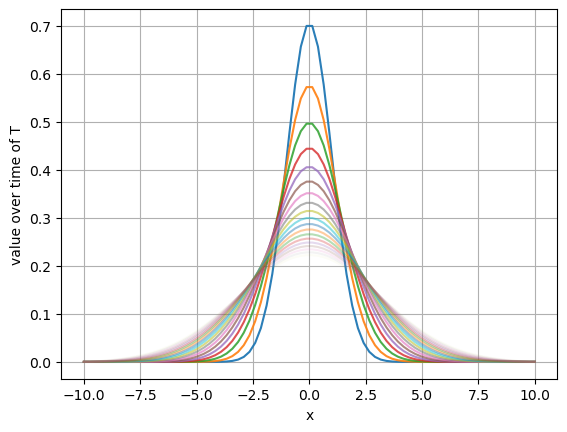

In [11]:
# Test the solution
num_points = 80
a=-10
b=10
x_values = np.linspace(a , b,  num_points)
T0 = get_y_test_function(x_values) # initial condition
max_time = 10.0

my_heat_equation = HeatEquationPDE(x_values, T0, max_time)
t_solution, y_solution = my_heat_equation.integrate_using_solve_ivp()

for i, t_i in enumerate(t_solution) :
    if (i > 0) and (i % 5 == 0) and (t_i > 0.0):
        labelt = "t="+str(round(t_i,2))
        f_t = y_solution[:,i]
        plt.plot(x_values, f_t, label=labelt, alpha=(1-t_i/max_time))

plt.xlabel('x')
plt.ylabel('value over time of T')
plt.grid()

### Q2.2 Using pseudospectral methods

Update the above code to use the pseudospectral derivative matrix as an alternative. Construct the grid of Gauus Lobato nodes and check you get similar results. Which method is more efficient? Which one is more stable?

Comment out the part of the code that zeros the time derivatives at either end of the grid. Does this still work? Does the FD one work too? What happens as you make the number of points large in each case?

Pseudospectral does not work if the derivative at the ends is not zero. FD method though does work. Solution gets smoother as points increase

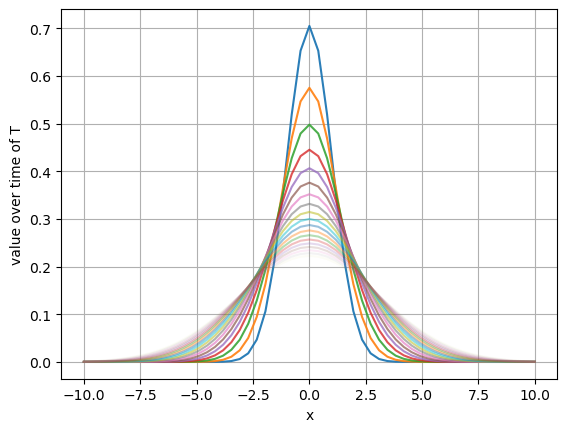

In [21]:
# Your code here...

# Test the solution
num_points = 80
a=-10
b=10
u_i = np.cos(np.pi * np.arange(num_points+1)/num_points)
x_values = (b-a)/2.0 * u_i + (a+b)/2.0
T0 = get_y_test_function(x_values) # initial condition
max_time = 10.0

my_heat_equation = HeatEquationPDE(x_values, T0, max_time, method = "pseudospectral")
t_solution, y_solution = my_heat_equation.integrate_using_solve_ivp()

for i, t_i in enumerate(t_solution) :
    if (i > 0) and (i % 5 == 0) and (t_i > 0.0):
        labelt = "t="+str(round(t_i,2))
        f_t = y_solution[:,i]

        # Just to make the plot nice use the points to reconstruct the fitting function
        #lagrange_polynomial = lagrange(x_values, f_t)
        #x_lagrange = np.linspace(a, b, 100)
        #plt.plot(x_lagrange, lagrange_polynomial(x_lagrange), '-', 
                 #label=labelt, alpha=(1-t_i/max_time))
        plt.plot(x_values, f_t, label=labelt, alpha=(1-t_i/max_time))

plt.xlabel('x')
plt.ylabel('value over time of T')
plt.grid()

### Q2.3 Optional extension

Optionally, extend the above class to allow integration using another method such as the midpoint or RK4 method.

In [13]:
# Your code here...